# Pharmaceutical Drug Spending Analysis

## Problem Statement

Pharmaceutical spending covers expenditure on prescription medicines and self-medication often referred to as
over-the-counter products. In some countries, other medical non-durable goods are also included. Pharmaceuticals
consumed in hospitals and other health care settings are excluded. Final expenditure on pharmaceuticals includes
wholesale and retail margins and value-added tax. Total pharmaceutical spending refers in most countries to “net”
spending, i.e. adjusted for possible rebates payable by manufacturers, wholesalers, or pharmacies. This indicator is
measured as a share of total health spending, in USD per capita (using economy-wide PPPs) and as a share of GDP.

Within these data, lies important patterns and variables that can be used by pharmaceutical companies to plan
business strategies. Find out some interesting insights from the data provided to you and make a dashboard using
any BI tool (such as Tableau, Power BI, etc ). Make a summary report based on your analysis.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("pharmaceutical-drug-spending.csv")
df

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76
...,...,...,...,...,...,...,...
1031,LTU,2012,28.942,1.820,448.728,NaN,1340.70
1032,LTU,2013,28.173,1.728,461.178,NaN,1364.02
1033,LTU,2014,27.836,1.724,485.245,NaN,1422.92
1034,LTU,2015,26.784,1.745,504.422,NaN,1465.30


In [27]:
df.shape

(1036, 6)

In [4]:
#Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


In [5]:
#checking Null values
print(df.isna().sum())

LOCATION         0
TIME             0
PC_HEALTHXP      0
PC_GDP           0
USD_CAP          0
FLAG_CODES     973
TOTAL_SPEND      0
dtype: int64


In [6]:
#checking Null Duplicate values
print(df.duplicated().sum())

0


In [7]:
df["FLAG_CODES"].value_counts()

B    46
D    11
P     6
Name: FLAG_CODES, dtype: int64

Text(0, 0.5, 'Count')

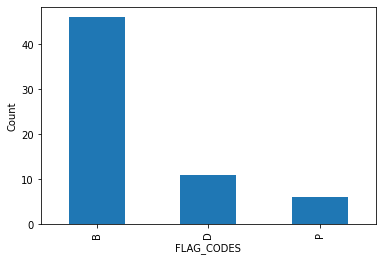

In [8]:
df.groupby('FLAG_CODES').size().plot(kind='bar',stacked=True)
plt.ylabel('Count')

In [9]:
df.drop(["FLAG_CODES"],axis=1,inplace=True)

In [10]:
df.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,1996.809846,16.406307,1.170948,295.046989,11765.423118
std,12.498330,6.389064,0.465635,209.152134,34878.286123
min,1970.000000,5.545000,0.207000,3.160000,6.290000
25%,1987.000000,11.516250,0.768250,111.098500,728.180000
50%,1999.000000,14.967500,1.141500,266.332000,2349.570000
75%,2007.000000,20.590500,1.523250,446.109500,7778.180000
max,2016.000000,40.239000,2.797000,1162.399000,373009.910000


<AxesSubplot:>

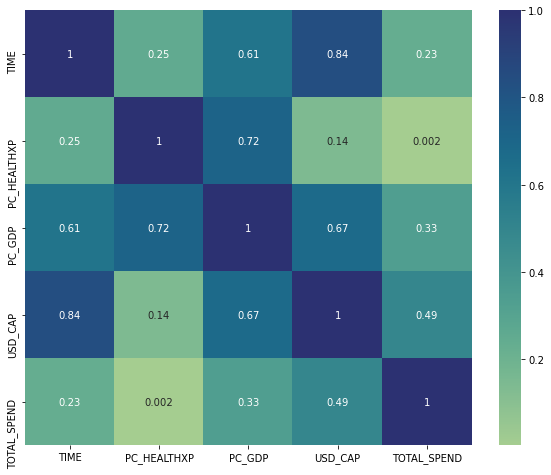

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='crest', annot=True)

In [12]:
df.cov()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
TIME,156.208251,20.278080,3.555518,2.187723e+03,1.022485e+05
PC_HEALTHXP,20.278080,40.820137,2.146566,1.878420e+02,4.535693e+02
PC_GDP,3.555518,2.146566,0.216816,6.559476e+01,5.420784e+03
USD_CAP,2187.722897,187.841986,65.594762,4.374462e+04,3.607317e+06
TOTAL_SPEND,102248.543782,453.569309,5420.784356,3.607317e+06,1.216495e+09


In [13]:
 df.astype({'LOCATION': 'category'}).set_index(['LOCATION', 'TIME'])

PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
LOCATION TIME                                           
AUS      1971       15.992   0.727   35.720       462.11
         1972       15.091   0.686   36.056       475.11
         1973       15.117   0.681   39.871       533.47
         1974       14.771   0.755   47.559       652.65
         1975       11.849   0.682   47.561       660.76
...                    ...     ...      ...          ...
LTU      2012       28.942   1.820  448.728      1340.70
         2013       28.173   1.728  461.178      1364.02
         2014       27.836   1.724  485.245      1422.92
         2015       26.784   1.745  504.422      1465.30
RUS      2015       22.939   1.286  309.900     44655.62

[1036 rows x 4 columns]

In [14]:
#Some countries comparison
df_DEU = df.query('LOCATION=="DEU"')
df_CHE = df.query('LOCATION=="CHE"')
df_ESP = df.query('LOCATION=="ESP"')
df_FRA = df.query('LOCATION=="FRA"')
df_GBR = df.query('LOCATION=="GBR"')
df_ITA = df.query('LOCATION=="ITA"')
df_KOR = df.query('LOCATION=="KOR"')
df_MEX = df.query('LOCATION=="MEX"')
df_RUS = df.query('LOCATION=="RUS"')
df_USA = df.query('LOCATION=="USA"')

Text(0.5, 0, 'Year')

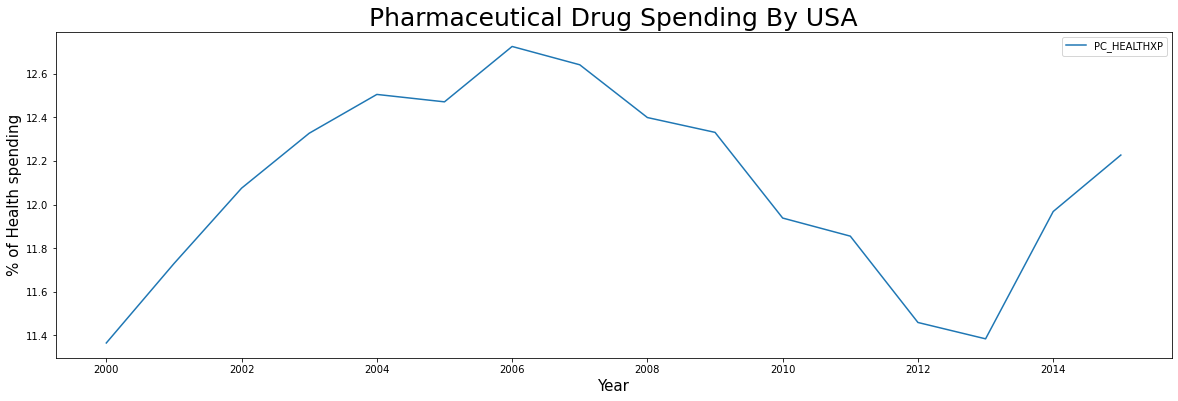

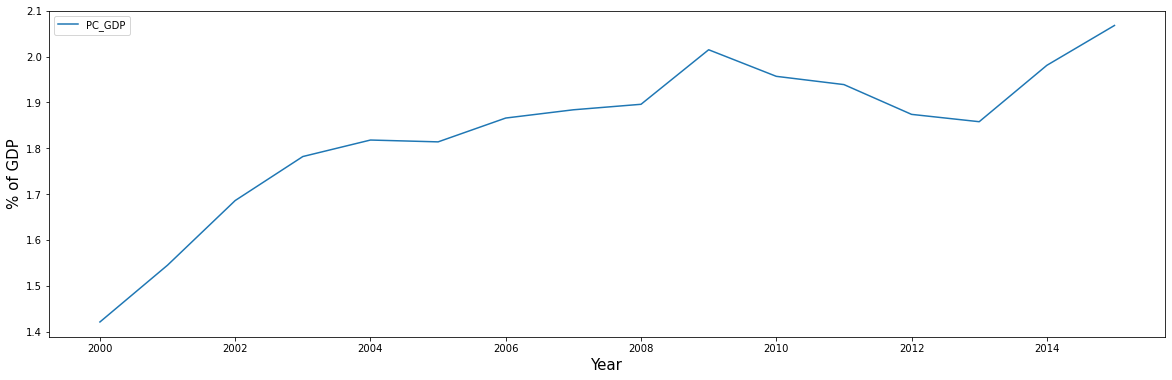

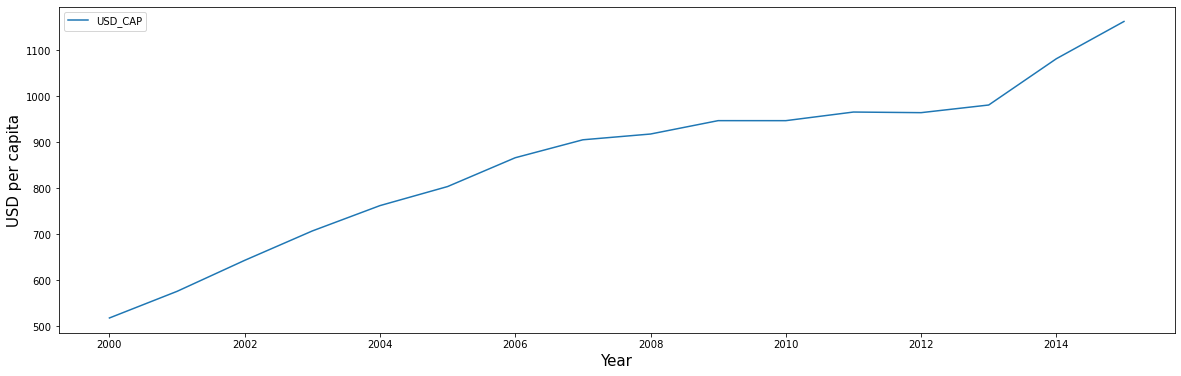

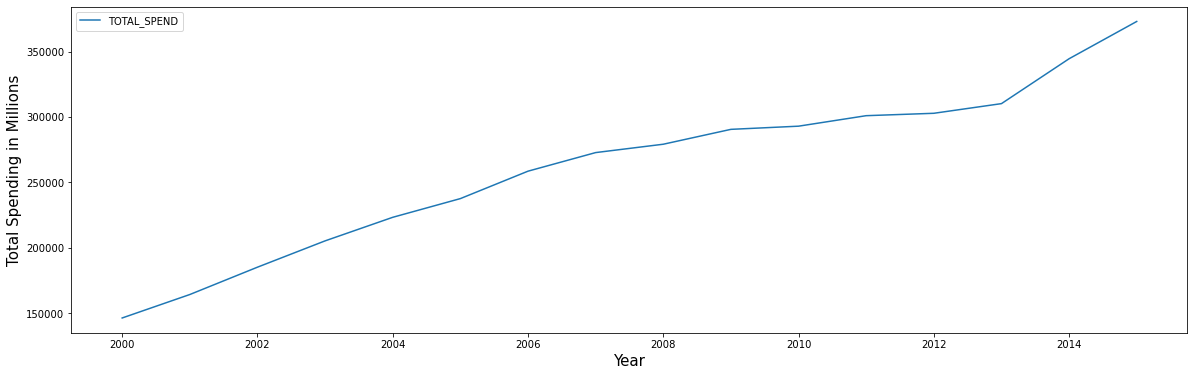

In [15]:
#Pharmaceutical Drug Spending By USA
df_USA.plot.line(x = 'TIME',y = 'PC_HEALTHXP',figsize=(20,6))
plt.title('Pharmaceutical Drug Spending By USA',fontsize = 25)
plt.ylabel("% of Health spending",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
df_USA.plot.line(x = 'TIME',y = 'PC_GDP',figsize=(20,6))
plt.ylabel("% of GDP",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
df_USA.plot.line(x = 'TIME',y = 'USD_CAP',figsize=(20,6))
plt.ylabel("USD per capita",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
df_USA.plot.line(x = 'TIME',y = 'TOTAL_SPEND',figsize=(20,6))
plt.ylabel("Total Spending in Millions",fontsize = 15)
plt.xlabel("Year",fontsize = 15)

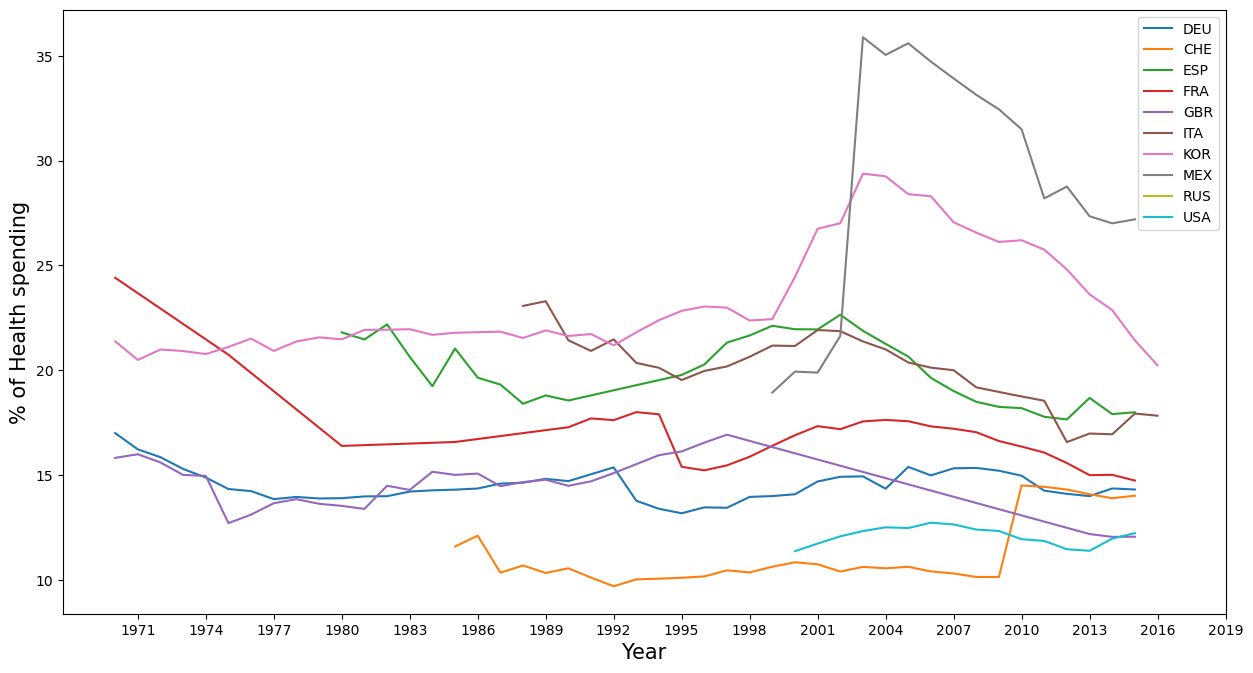

In [16]:
#% of Health spending
plt.figure(figsize=(15, 8), dpi=100)
plt.plot('TIME','PC_HEALTHXP',label='DEU',data = df_DEU)
plt.plot('TIME','PC_HEALTHXP',label='CHE',data = df_CHE)
plt.plot('TIME','PC_HEALTHXP',label='ESP',data = df_ESP)
plt.plot('TIME','PC_HEALTHXP',label='FRA',data = df_FRA)
plt.plot('TIME','PC_HEALTHXP',label='GBR',data = df_GBR)
plt.plot('TIME','PC_HEALTHXP',label='ITA',data = df_ITA)
plt.plot('TIME','PC_HEALTHXP',label='KOR',data = df_KOR)
plt.plot('TIME','PC_HEALTHXP',label='MEX',data = df_MEX)
plt.plot('TIME','PC_HEALTHXP',label='RUS',data = df_RUS)
plt.plot('TIME','PC_HEALTHXP',label='USA',data = df_USA)
x_ticks = np.arange(1971, 2020, 3)
plt.xticks(x_ticks)
plt.ylabel("% of Health spending",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
plt.legend()
plt.show()

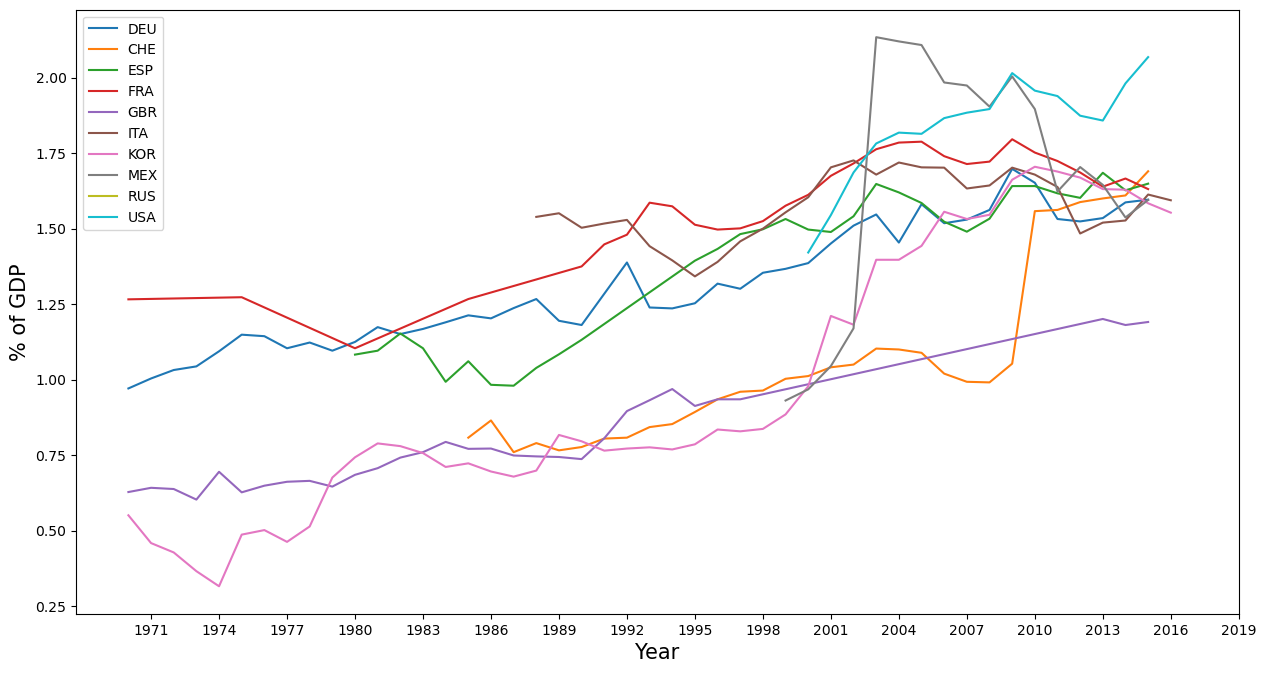

In [17]:
#% of GDP
plt.figure(figsize=(15, 8), dpi=100)
plt.plot('TIME','PC_GDP',label='DEU',data = df_DEU)
plt.plot('TIME','PC_GDP',label='CHE',data = df_CHE)
plt.plot('TIME','PC_GDP',label='ESP',data = df_ESP)
plt.plot('TIME','PC_GDP',label='FRA',data = df_FRA)
plt.plot('TIME','PC_GDP',label='GBR',data = df_GBR)
plt.plot('TIME','PC_GDP',label='ITA',data = df_ITA)
plt.plot('TIME','PC_GDP',label='KOR',data = df_KOR)
plt.plot('TIME','PC_GDP',label='MEX',data = df_MEX)
plt.plot('TIME','PC_GDP',label='RUS',data = df_RUS)
plt.plot('TIME','PC_GDP',label='USA',data = df_USA)
x_ticks = np.arange(1971, 2020, 3)
plt.xticks(x_ticks)
plt.ylabel("% of GDP",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
plt.legend()
plt.show()

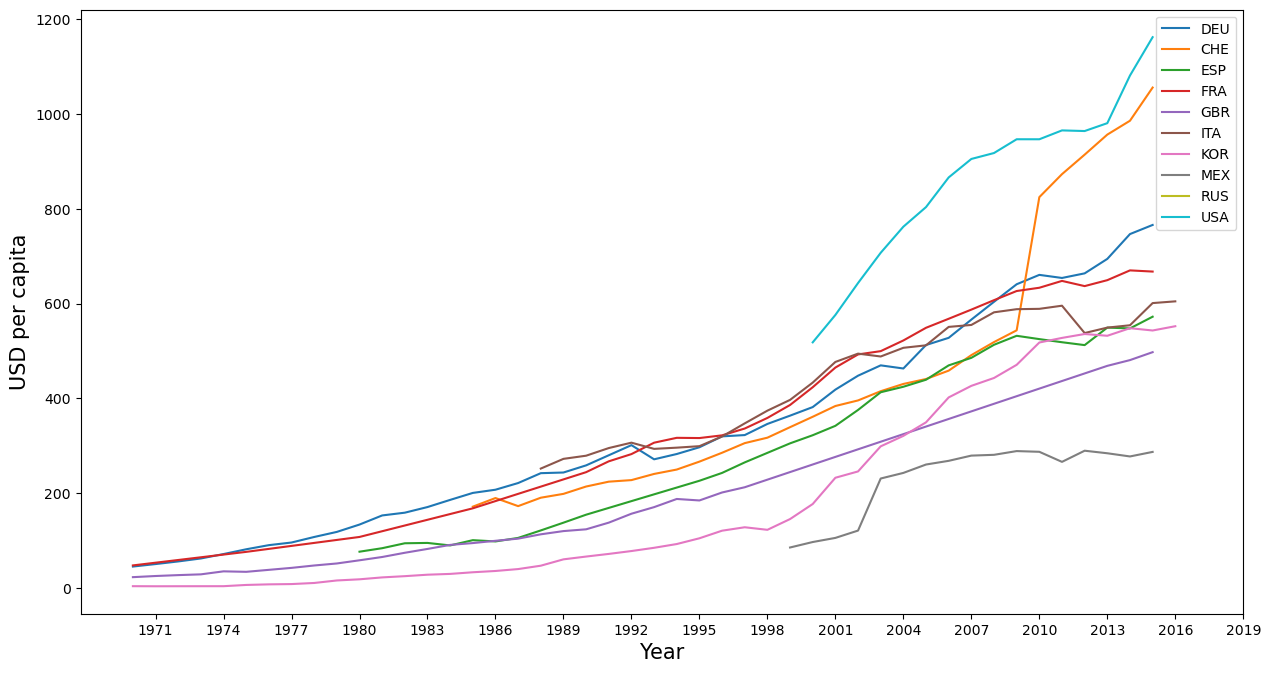

In [18]:
#USD per capita
plt.figure(figsize=(15, 8), dpi=100)
plt.plot('TIME','USD_CAP',label='DEU',data = df_DEU)
plt.plot('TIME','USD_CAP',label='CHE',data = df_CHE)
plt.plot('TIME','USD_CAP',label='ESP',data = df_ESP)
plt.plot('TIME','USD_CAP',label='FRA',data = df_FRA)
plt.plot('TIME','USD_CAP',label='GBR',data = df_GBR)
plt.plot('TIME','USD_CAP',label='ITA',data = df_ITA)
plt.plot('TIME','USD_CAP',label='KOR',data = df_KOR)
plt.plot('TIME','USD_CAP',label='MEX',data = df_MEX)
plt.plot('TIME','USD_CAP',label='RUS',data = df_RUS)
plt.plot('TIME','USD_CAP',label='USA',data = df_USA)
x_ticks = np.arange(1971, 2020, 3)
plt.xticks(x_ticks)
plt.ylabel("USD per capita",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
plt.legend()
plt.show()

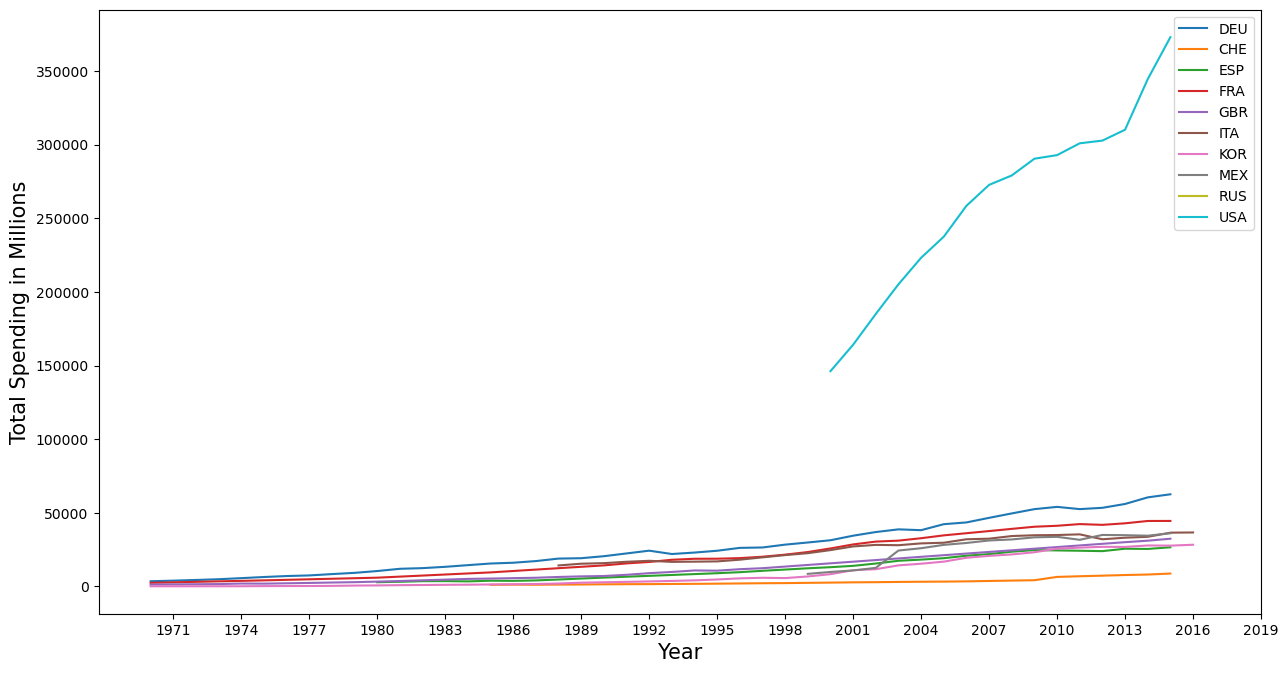

In [19]:
#Total Spending in Millions
plt.figure(figsize=(15, 8), dpi=100)
plt.plot('TIME','TOTAL_SPEND',label='DEU',data = df_DEU)
plt.plot('TIME','TOTAL_SPEND',label='CHE',data = df_CHE)
plt.plot('TIME','TOTAL_SPEND',label='ESP',data = df_ESP)
plt.plot('TIME','TOTAL_SPEND',label='FRA',data = df_FRA)
plt.plot('TIME','TOTAL_SPEND',label='GBR',data = df_GBR)
plt.plot('TIME','TOTAL_SPEND',label='ITA',data = df_ITA)
plt.plot('TIME','TOTAL_SPEND',label='KOR',data = df_KOR)
plt.plot('TIME','TOTAL_SPEND',label='MEX',data = df_MEX)
plt.plot('TIME','TOTAL_SPEND',label='RUS',data = df_RUS)
plt.plot('TIME','TOTAL_SPEND',label='USA',data = df_USA)
x_ticks = np.arange(1971, 2020, 3)
plt.xticks(x_ticks)
plt.ylabel("Total Spending in Millions",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
plt.legend()
plt.show()

In [20]:
df_time1 = df.query('TIME=="1971"')
df_time2 = df.query('TIME=="1976"')
df_time3 = df.query('TIME=="1981"')
df_time4 = df.query('TIME=="1986"')
df_time5 = df.query('TIME=="1991"')
df_time6 = df.query('TIME=="1996"')
df_time7 = df.query('TIME=="2001"')
df_time8 = df.query('TIME=="2006"')
df_time9 = df.query('TIME=="2011"')
df_time10 = df.query('TIME=="2015"')

Text(0.5, 0, 'LOCATION')

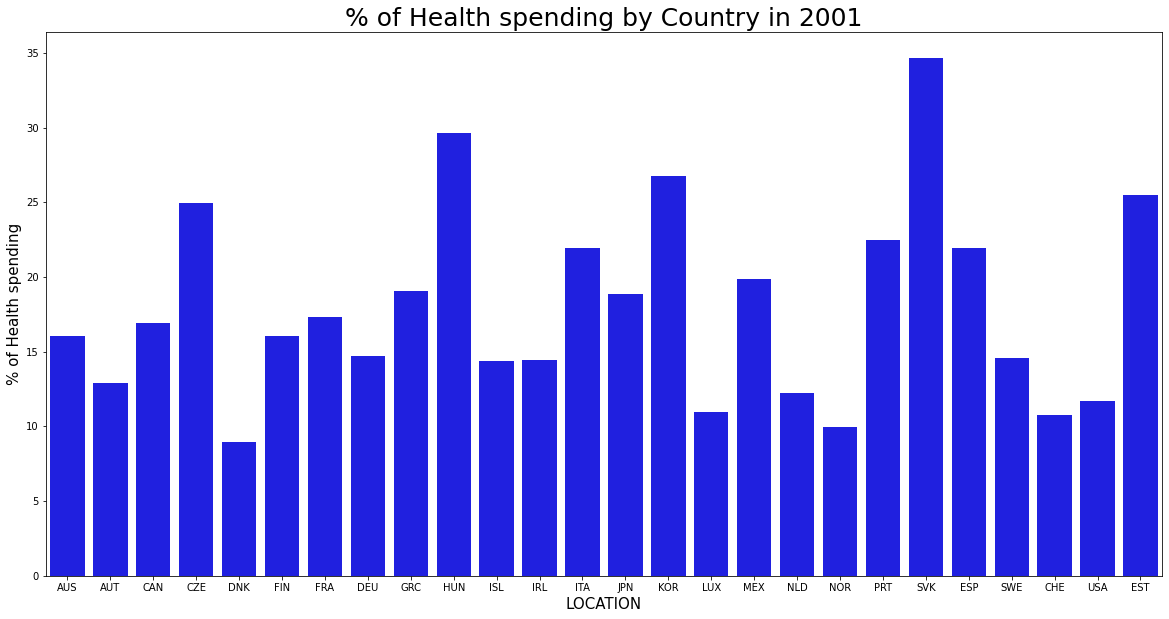

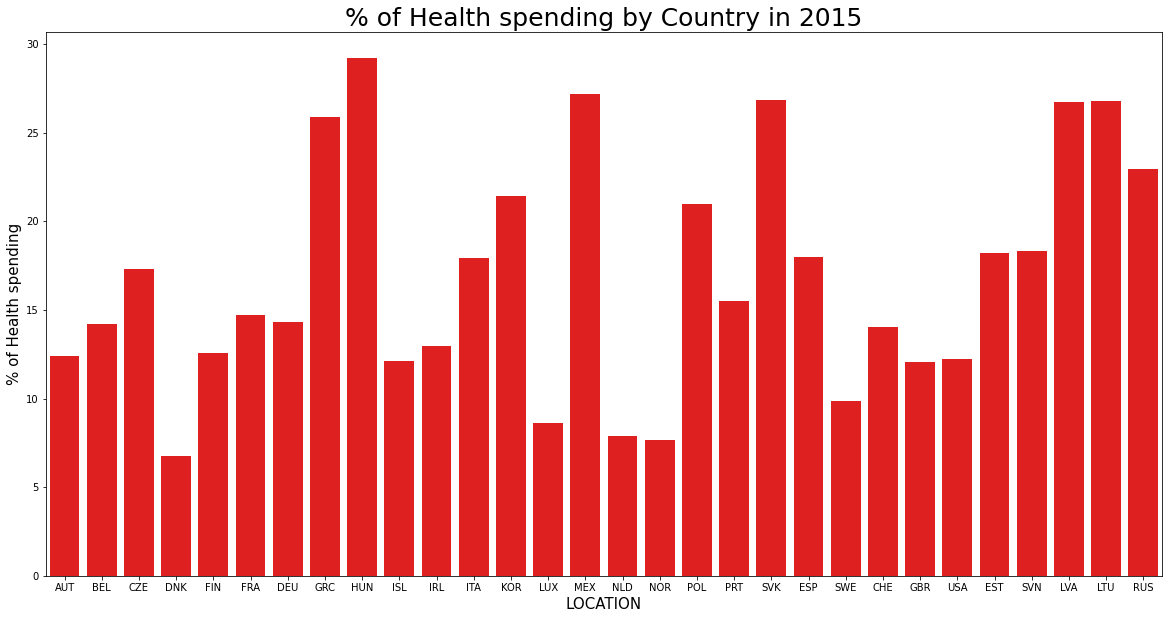

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='PC_HEALTHXP',color='b',data=df_time7)
plt.title('% of Health spending by Country in 2001',fontsize = 25)
plt.ylabel("% of Health spending",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='PC_HEALTHXP',color='r',data=df_time10)
plt.title('% of Health spending by Country in 2015',fontsize = 25)
plt.ylabel("% of Health spending",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)


Text(0.5, 0, 'LOCATION')

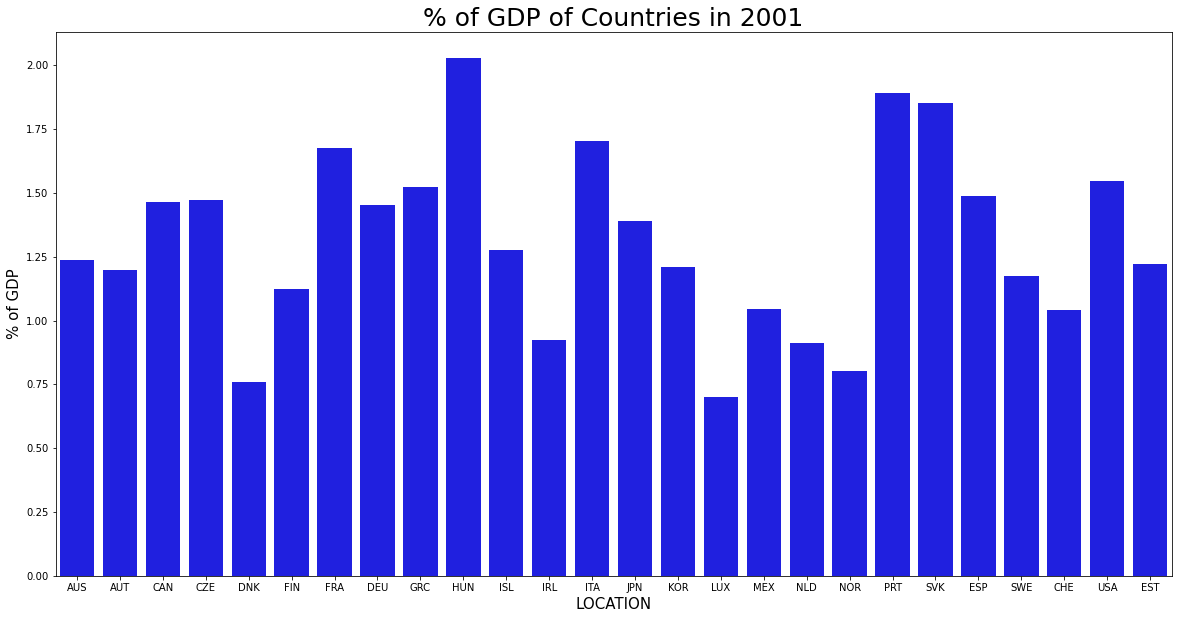

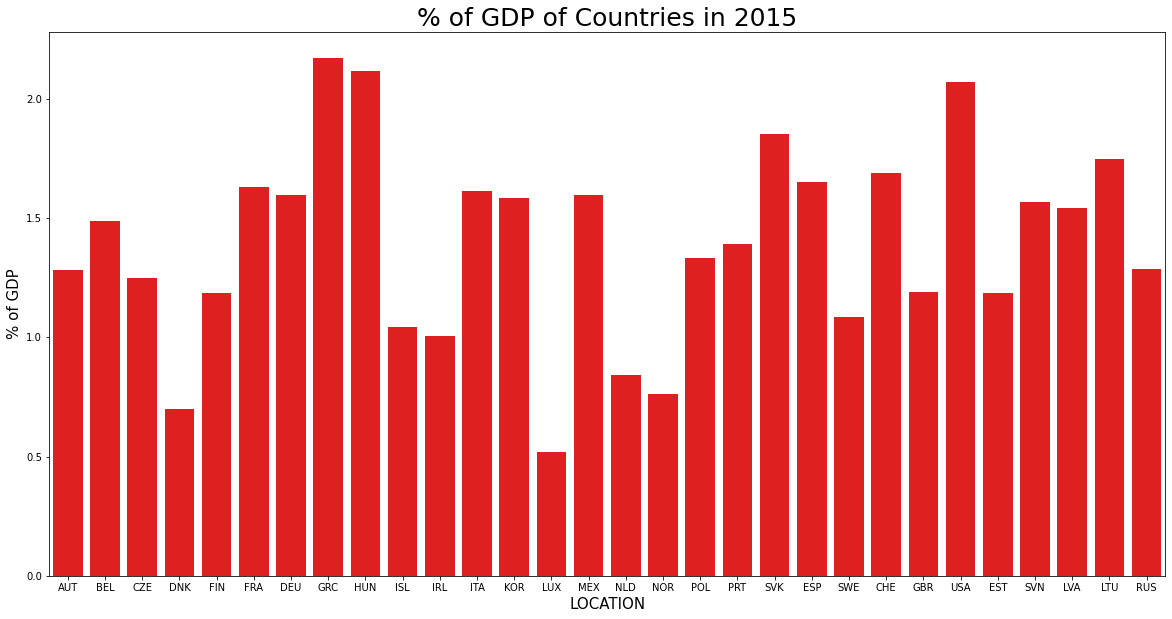

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='PC_GDP',color='b',data=df_time7)
plt.title('% of GDP of Countries in 2001',fontsize = 25)
plt.ylabel("% of GDP",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='PC_GDP',color='r',data=df_time10)
plt.title('% of GDP of Countries in 2015',fontsize = 25)
plt.ylabel("% of GDP",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)

Text(0.5, 0, 'LOCATION')

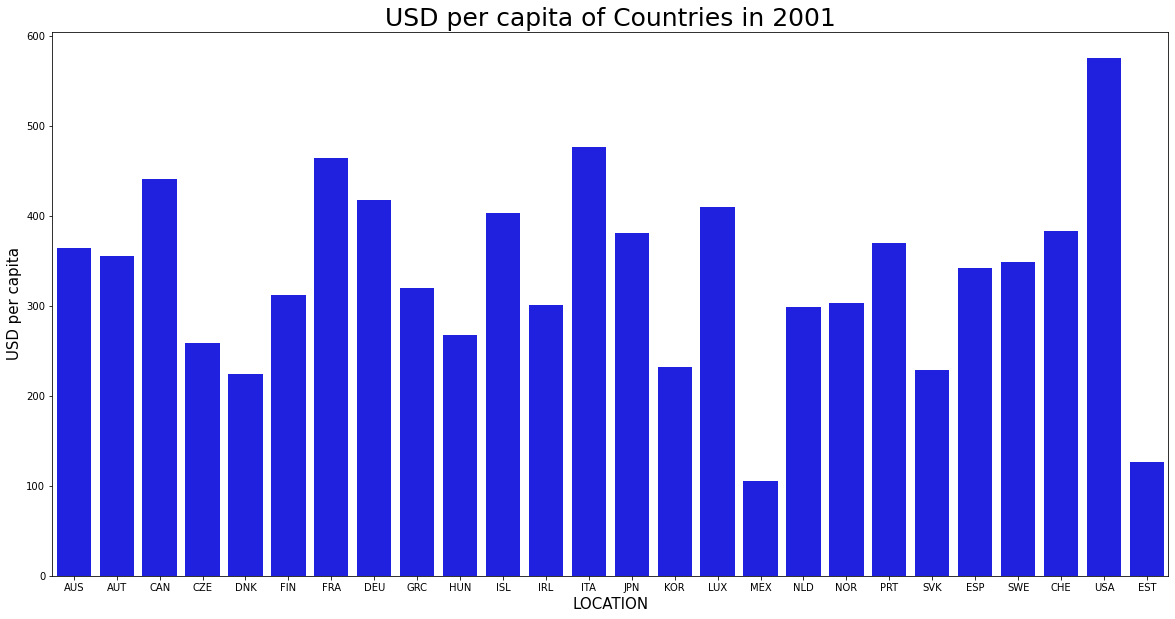

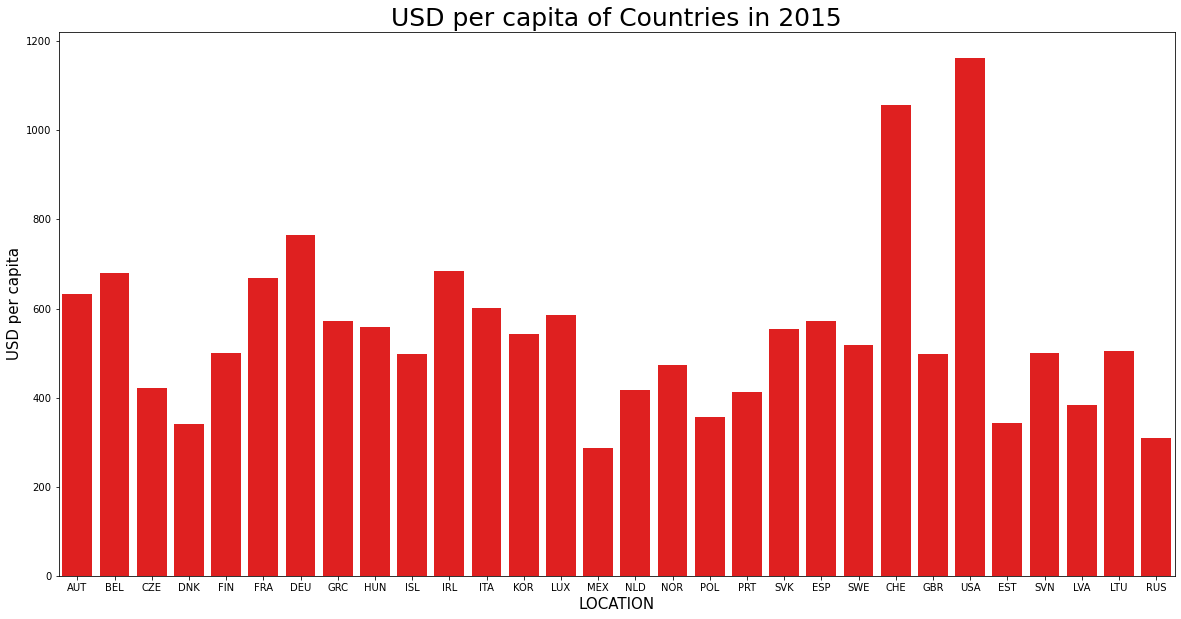

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='USD_CAP',color='b',data=df_time7)
plt.title('USD per capita of Countries in 2001',fontsize = 25)
plt.ylabel("USD per capita",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='USD_CAP',color='r',data=df_time10)
plt.title('USD per capita of Countries in 2015',fontsize = 25)
plt.ylabel("USD per capita",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)

Text(0.5, 0, 'LOCATION')

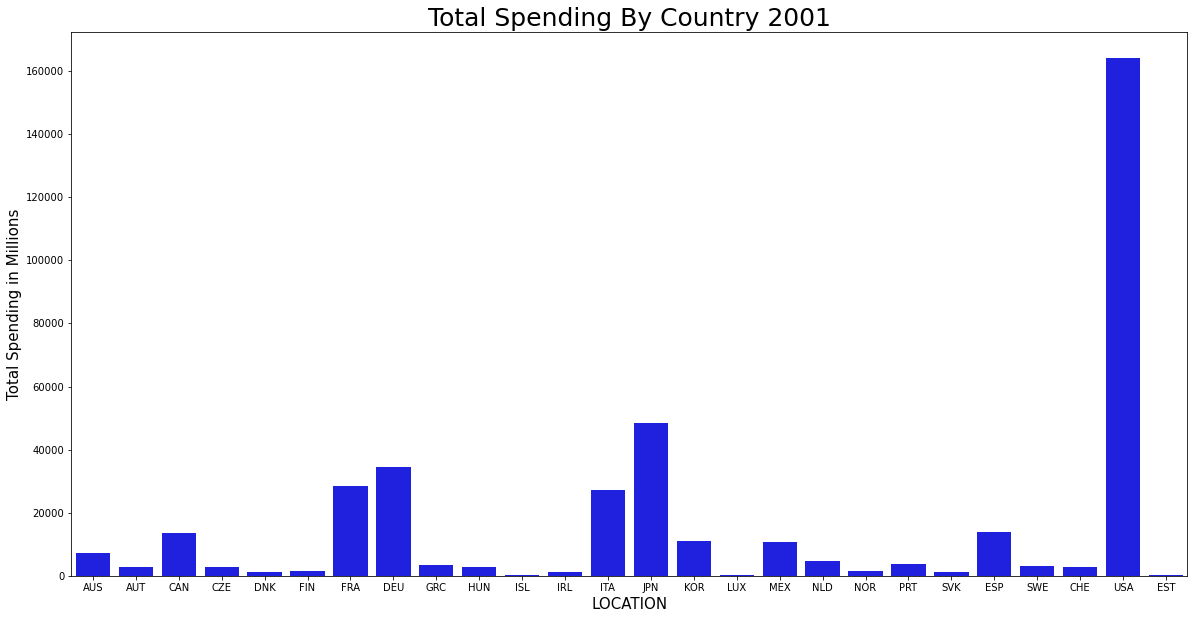

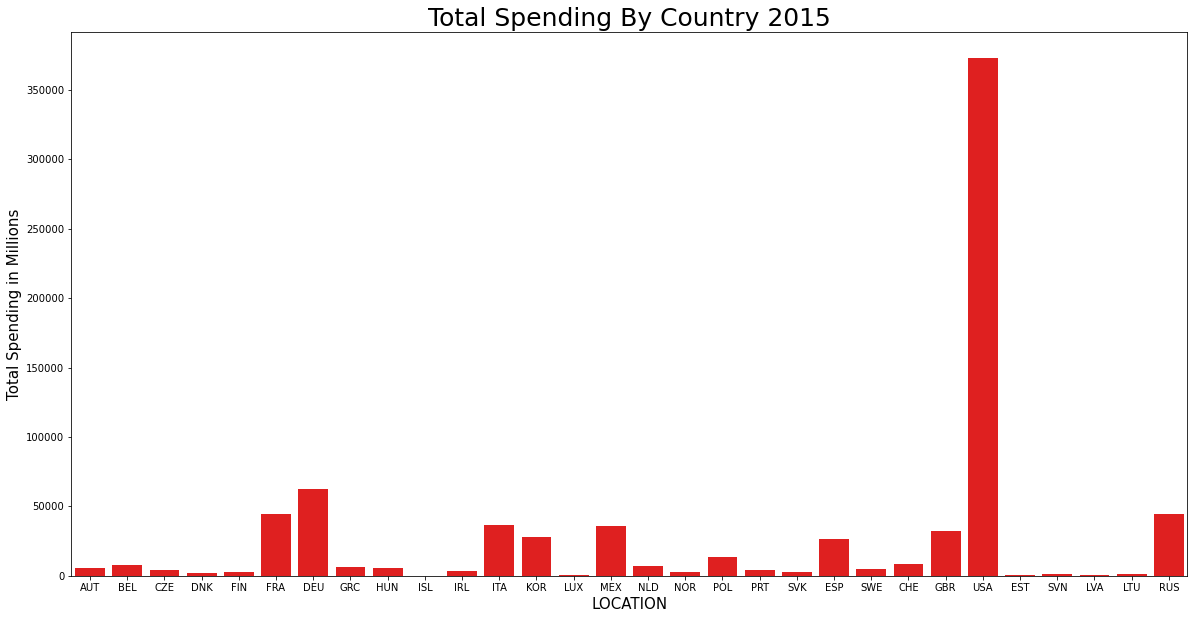

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='TOTAL_SPEND',color='b',data=df_time7)
plt.title('Total Spending By Country 2001',fontsize = 25)
plt.ylabel("Total Spending in Millions",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)
plt.figure(figsize=(20,10))
sns.barplot(x='LOCATION',y='TOTAL_SPEND',color='r',data=df_time10)
plt.title('Total Spending By Country 2015',fontsize = 25)
plt.ylabel("Total Spending in Millions",fontsize = 15)
plt.xlabel("LOCATION",fontsize = 15)

### Conclusion

•	Compared with other high-income countries, the United States spends the most per capita on prescription drugs.

•	From 2006 to 2013, the USA reduced health spending, as well as a decline in their GDP.

•	The total spending of the USA is higher than other countries.

•	The high and low % GDP in 2015 belong to Greece and Luxembourg respectively.

•	Hungary Total Spending is lower than other countries but % of health spending is higher than other countries.

•	From 2001, health spending slowed in most of the countries. While Total spending rose in 2001 onwards.

•	Usd_Cap and Time highly correlated i.e., USD per capita increased with time.


In [26]:
df.to_excel('pharmaceutical-drug-spending.xlsx')